# Q1
Write a python program which searches all the product under a particular product vertical
from www.amazon.in. The product verticals to be searched will be taken as input from user.
For e.g. If user input is ‘guitar’. Then search for guitars.

In [29]:
#lets import the required libraries
import selenium
import pandas as pd
from selenium import webdriver
import time

In [30]:
#lets first connect to the driver
driver=webdriver.Chrome("chromedriver.exe")

In [31]:
url="https://www.amazon.in/"
driver.get(url)

In [32]:
#finding the element for search bar
search_bar=driver.find_element_by_id("twotabsearchtextbox")
search_bar

<selenium.webdriver.remote.webelement.WebElement (session="8d033652a43fe9a13cc65deafbc7bb28", element="4746e959-a099-4c97-a236-99fe36d7e2b3")>

In [33]:
#write on the searchbar
search_bar.send_keys("ukulele")

In [34]:
#click on the search button
search_btn=driver.find_element_by_id("nav-search-submit-button")
search_btn.click()

# Q2
In the above question, now scrape the following details of each product listed in first 3 pages 
of your search results and save it in a dataframe and csv. In case if any product vertical has 
less than 3 pages in search results then scrape all the products available under that product 
vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of 
Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" 
and “Product URL”. In case, if any of the details are missing for any of the product then 
replace it by “-“

In [35]:
#extracyting the product urls from the first 3 pages
urls=[]
for i in (0,3):
    for j in driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']"):
        urls.append(j.get_attribute('href'))

In [36]:
urls

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A100553314ZRS515SU4M2&url=%2FKadence-Concert-Size-Ukulele-Spruce-Top%2Fdp%2FB07C3WT9FF%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dukulele%26qid%3D1622805843%26sr%3D8-1-spons%26psc%3D1&qualifier=1622805843&id=672098350896582&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A064189134HE3XTF15FPS&url=%2FZabel-21inch-Soprano-Ukulele-Brown%2Fdp%2FB08XMJSQQS%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dukulele%26qid%3D1622805843%26sr%3D8-2-spons%26psc%3D1&qualifier=1622805843&id=672098350896582&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A02492723AXV0CVICXF9U&url=%2FKadence-Ukulele-24-Spruce-Special%2Fdp%2FB07JLPNNLM%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dukulele%26qid%3D1622805843%26sr%3D8-3-spons%26psc%3D1&qualifier=1622805843&id=672098350

In [37]:
brand=[]
product_name=[]
rating=[]
no_rating=[]
price=[]
return_exchange=[]
availability=[]
delivery=[]
product_URL=[]
other_details=[]

In [38]:
from selenium.common.exceptions import NoSuchElementException
for i in urls:
    driver.get(i)
    time.sleep(4)
    #extracting product brands
    try:
        brand_tag=driver.find_element_by_xpath("//tr[@class='a-spacing-small']//td[2]")
        brand.append(brand_tag.text)
    except NoSuchElementException:
        brand.append('-')
    # extracting product name
    try:
        name=driver.find_element_by_xpath("//h1[@class='a-size-large a-spacing-none']//span[1]")
        product_name.append(name.text)
    except NoSuchElementException:
        product_name.append('-')
    #extracting rating
    try:
        rating_tag=driver.find_element_by_xpath("//span[@class='a-size-base a-nowrap']//span[1]")
        rating.append(rating_tag.text)
    except NoSuchElementException:
        rating.append('-')
    #extracting number of rating
    try:
        rat_no=driver.find_element_by_xpath("//div[@class='a-row a-spacing-medium averageStarRatingNumerical']//span[1]")
        no_rating.append(rat_no.text)
    except NoSuchElementException:
        no_rating.append('-')
    #extracting price
    try:
        price_tag=driver.find_element_by_id("priceblock_ourprice")
        price.append(price_tag.text)
    except NoSuchElementException:
        price.append('-')
    #extracting details of return/exchange 
    try:
        ret_ex=driver.find_element_by_xpath("//div[@id='RETURNS_POLICY']//span//div[2]//a")
        return_exchange.append(ret_ex.text)
        
    except NoSuchElementException:
        return_exchange.append('-')
    #extracting product availability
    try:
        availability_tag=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-success']")
        availability.append(availability_tag.text)
        
    except NoSuchElementException:
        availability.append('-')
    #fetching delivery details
    try:
        delivery_tag=driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini']//b")
        delivery.append(delivery_tag.text)
    except NoSuchElementException:
        delivery.append('-')
    #fetching other details of the product
    try:
        details=driver.find_element_by_xpath("//ul[@class='a-unordered-list a-vertical a-spacing-mini']")
        other_details.append(details.text)
    except NoSuchElementException:
        other_details.append('-')
    #fetching URl
    product_URL.append(urls)
    

In [39]:
brand

['Kadence',
 'Zabel',
 'Kadence',
 'Kadence',
 'Kadence',
 'Juarez',
 'Kadence',
 'Kadence',
 'Kadence',
 'Kadence',
 'Kadence',
 'Kadence',
 'Kadence',
 'Juarez',
 'Martin Smith',
 'ARCTIC',
 'Ashton',
 'Martin Smith',
 'Juarez',
 'Kadence',
 'Juarez',
 'Intern',
 'Juarez',
 'Kadence',
 'JUAREZ',
 'Kadence',
 'Batking',
 'HEALLILY',
 'Kadence',
 'Juarez',
 'Juarez',
 'Juarez',
 'Juarez',
 'Martin Smith',
 'Musoo',
 'Kadence',
 'Kadence',
 'Zabel',
 'Kadence',
 'Kadence',
 'Juarez',
 'Juarez',
 'Juarez',
 'Mootea',
 'Kadence',
 'JUAREZ',
 'Kadence',
 'Kadence',
 'DJT Enterprise',
 'Juarez',
 'Asago',
 'JUAREZ',
 'VAULT',
 '-',
 'Kadence',
 'HEALLILY',
 'Kadence',
 'Generic',
 'Kadence',
 'Juarez',
 'Juarez',
 'Diva Enterprise',
 'Stagg',
 'Pluto',
 'Fabater',
 'Kadence',
 'Kadence',
 'Juarez',
 'JUAREZ',
 'Juarez',
 'Kadence',
 'Zabel',
 'Kadence',
 'Kadence',
 'Kadence',
 'Juarez',
 'Kadence',
 'Kadence',
 'Kadence',
 'Kadence',
 'Kadence',
 'Kadence',
 'Kadence',
 'Juarez',
 'Martin 

In [40]:
product_name

['Kadence Ukulele Concert 24 inch, Spruce Top with Bag (Semi/Electro Acosutic)',
 'Zabel 21inch Soprano Ukulele with Bag Brown',
 'Kadence Ukulele Concert 24" Spruce Special',
 'Kadence Ukulele Solid Spruce Top, Rosewood Back With Equalizer (Concert with Teddy Bear Flight Case Combo)',
 'Kadence Wanderer Series Brown Mahogany wood Ukulele with Bag and Tuner (Wanderer 21", Acoustic)',
 'Juarez JRZ23UK/NA 23" Concert Size Ukulele Kit, AQUILA Strings, Sapele Body, Rosewood Fingerboard, Matte Finish, with Bag and Picks, Natural Brown',
 'Kadence Ukulele 23" Concert Spring Summer Collection of Ukuleles (Cinnamon Brown)',
 'Kadence Ukulele Black Mahagony, Concert Size',
 'Kadence Concert Size Ukulele, Pineapple Shape',
 'Kadence Ukulele Concert 24" Spruce Special',
 'Kadence Ukulele 24" Concert Size Speical Wood Ukulele (Black Wood)',
 'Kadence Ukulele Concert 24 inch, Spruce Top with Bag (Acoustic with Tuner)',
 'Kadence Wanderer Series Brown Mahogany wood Ukulele with Bag and Tuner (Wander

In [41]:
rating

['4.3 out of 5',
 '3.9 out of 5',
 '4.2 out of 5',
 '4 out of 5',
 '4.3 out of 5',
 '4.2 out of 5',
 '4.4 out of 5',
 '4.1 out of 5',
 '4.2 out of 5',
 '4.2 out of 5',
 '4.2 out of 5',
 '4.3 out of 5',
 '4.3 out of 5',
 '4.2 out of 5',
 '3.6 out of 5',
 '3.8 out of 5',
 '3.8 out of 5',
 '3.6 out of 5',
 '4.1 out of 5',
 '4.2 out of 5',
 '3.4 out of 5',
 '3.7 out of 5',
 '3.7 out of 5',
 '4.2 out of 5',
 '-',
 '4.3 out of 5',
 '-',
 '-',
 '4.2 out of 5',
 '4 out of 5',
 '4.2 out of 5',
 '3.4 out of 5',
 '3.8 out of 5',
 '3.6 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '4.1 out of 5',
 '3.9 out of 5',
 '3.8 out of 5',
 '4.1 out of 5',
 '4.4 out of 5',
 '3.5 out of 5',
 '3.8 out of 5',
 '-',
 '4.1 out of 5',
 '3.9 out of 5',
 '3.8 out of 5',
 '4.2 out of 5',
 '-',
 '3.9 out of 5',
 '-',
 '4.3 out of 5',
 '4.4 out of 5',
 '-',
 '4.7 out of 5',
 '-',
 '4 out of 5',
 '4 out of 5',
 '3.5 out of 5',
 '3.8 out of 5',
 '3.4 out of 5',
 '-',
 '4 out of 5',
 '4.1 out of 5',
 '-',
 '5 out of 5',
 '

In [42]:
no_rating

['695 global ratings',
 '145 global ratings',
 '83 global ratings',
 '51 global ratings',
 '2,215 global ratings',
 '2,661 global ratings',
 '263 global ratings',
 '129 global ratings',
 '94 global ratings',
 '83 global ratings',
 '15 global ratings',
 '695 global ratings',
 '2,215 global ratings',
 '2,661 global ratings',
 '2,097 global ratings',
 '94 global ratings',
 '23 global ratings',
 '2,097 global ratings',
 '599 global ratings',
 '840 global ratings',
 '37 global ratings',
 '145 global ratings',
 '22 global ratings',
 '695 global ratings',
 '-',
 '695 global ratings',
 '-',
 '-',
 '94 global ratings',
 '3 global ratings',
 '2,661 global ratings',
 '37 global ratings',
 '19 global ratings',
 '2,097 global ratings',
 '166 global ratings',
 '21 global ratings',
 '16 global ratings',
 '145 global ratings',
 '17 global ratings',
 '129 global ratings',
 '12 global ratings',
 '7 global ratings',
 '19 global ratings',
 '-',
 '44 global ratings',
 '15 global ratings',
 '7 global rating

In [43]:
price

['₹ 2,999.00',
 '-',
 '-',
 '₹ 6,999.00',
 '-',
 '₹ 2,399.00',
 '-',
 '-',
 '₹ 2,999.00',
 '-',
 '-',
 '-',
 '-',
 '₹ 2,399.00',
 '₹ 1,429.00',
 '₹ 2,371.00',
 '₹ 1,989.00',
 '₹ 1,429.00',
 '₹ 2,299.00',
 '-',
 '-',
 '-',
 '₹ 1,899.00',
 '-',
 '₹ 2,250.00',
 '₹ 2,599.00',
 '₹ 2,499.00',
 '₹ 1,010.89',
 '₹ 2,999.00',
 '-',
 '₹ 2,399.00',
 '-',
 '-',
 '₹ 1,429.00',
 '₹ 3,999.00',
 '-',
 '-',
 '₹ 1,999.00',
 '₹ 2,499.00',
 '-',
 '₹ 2,269.00',
 '₹ 1,899.00',
 '-',
 '-',
 '₹ 3,499.00',
 '-',
 '-',
 '-',
 '₹ 1,799.00',
 '₹ 2,999.00',
 '₹ 799.00',
 '-',
 '₹ 1,550.00',
 '₹ 745.00',
 '₹ 2,499.00',
 '₹ 865.89',
 '₹ 2,499.00',
 '₹ 1,998.00',
 '-',
 '₹ 1,999.00',
 '₹ 2,212.00',
 '₹ 1,799.00',
 '₹ 2,849.00',
 '₹ 2,599.00',
 '₹ 2,239.00',
 '-',
 '-',
 '₹ 1,999.00',
 '-',
 '₹ 2,999.00',
 '₹ 2,999.00',
 '-',
 '-',
 '₹ 6,999.00',
 '-',
 '₹ 2,399.00',
 '-',
 '-',
 '₹ 2,999.00',
 '-',
 '-',
 '-',
 '-',
 '₹ 2,399.00',
 '₹ 1,429.00',
 '₹ 2,371.00',
 '₹ 1,989.00',
 '₹ 1,429.00',
 '₹ 2,299.00',
 '-',
 '-',
 

In [44]:
return_exchange

['7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '7 Days Replacement',
 '10 Days R

In [45]:
availability

['In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 2 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 2 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In st

In [46]:
delivery

['Thursday, June 10',
 'Thursday, June 10',
 'Thursday, June 10',
 'Thursday, June 10',
 'Thursday, June 10',
 'Wednesday, June 9',
 'Thursday, June 10',
 'Wednesday, June 9',
 'Thursday, June 10',
 'Thursday, June 10',
 'Wednesday, June 9',
 'Thursday, June 10',
 'Thursday, June 10',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Monday, June 7',
 'Sunday, June 13',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Thursday, June 10',
 'Monday, June 7',
 'Thursday, June 10',
 'Wednesday, June 9',
 'June 29 - July 2',
 'Thursday, June 10',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Thursday, June 10',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Thursday, June 10',
 'Thursday, June 10',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Wednesday, June 9',
 'Thursday, June 10',
 '-',
 'Thursday, June 10',
 'Wednesday, June 9',
 'Wednesday, 

In [47]:
product_URL

[['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A100553314ZRS515SU4M2&url=%2FKadence-Concert-Size-Ukulele-Spruce-Top%2Fdp%2FB07C3WT9FF%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dukulele%26qid%3D1622805843%26sr%3D8-1-spons%26psc%3D1&qualifier=1622805843&id=672098350896582&widgetName=sp_atf',
  'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A064189134HE3XTF15FPS&url=%2FZabel-21inch-Soprano-Ukulele-Brown%2Fdp%2FB08XMJSQQS%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dukulele%26qid%3D1622805843%26sr%3D8-2-spons%26psc%3D1&qualifier=1622805843&id=672098350896582&widgetName=sp_atf',
  'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A02492723AXV0CVICXF9U&url=%2FKadence-Ukulele-24-Spruce-Special%2Fdp%2FB07JLPNNLM%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dukulele%26qid%3D1622805843%26sr%3D8-3-spons%26psc%3D1&qualifier=1622805843&id=672098

In [48]:
other_details

['Easy to use\nLightweight product\nPortable product',
 '✅ KEEP CALM & PLAY THE UKULELE - Discover the unique melodic sound of the Hawaiian Islands with our elite 21" Soprano Ukulele Beginner Pack! Now you can teach yourself the ukulele, thanks to our all-inclusive beginner\'s kit that includes a 21" ukulele\n✅ SUPERIOR-QUALITY CRAFTSMANSHIP - Our amazing 21" traditional soprano ukulele combines selected fine basswood for the body, solid wood for the neck and blackwood for the finger board and bridge. Eco-friendly design will make it your favorite musical instrument\n✅ LEARN HOW TO PLAY WHILE HAVING FUN -12 Nickel Silver Frets with correct frets positing marked on 5th, 7th, 10th of blackwood fingerboard. The magnificent soprano ukulele features playable nylon string, easy keeping in tune nylon strings which stay in tune after playing for a while. Most string instruments initially need time to adjust to the climate and such. Continue tuning it every time if it goes out of tune, and even

In [49]:
#Lets check the length of the list,if the length of the list are not equal then we can't form a dataframe. 

len(brand),len(product_name),len(rating),len(no_rating),len(price),len(return_exchange),len(availability),len(delivery),len(other_details),len(product_URL)

(140, 140, 140, 140, 140, 140, 140, 140, 140, 140)

In [52]:
ukulele=pd.DataFrame(({}))
ukulele['Brand Name']=brand
ukulele['Name of the Product']=product_name
ukulele['Rating']=rating
ukulele['Number of Rating']=no_rating
ukulele['Price']=price
ukulele['Return/Exchange']=return_exchange
ukulele['Availability']=availability
ukulele['Expected Delivery']=delivery
ukulele['Other Details']=other_details
ukulele['Product URL']=product_URL

In [53]:
ukulele

Brand Name                                Name of the Product  \
0      Kadence  Kadence Ukulele Concert 24 inch, Spruce Top wi...   
1        Zabel        Zabel 21inch Soprano Ukulele with Bag Brown   
2      Kadence         Kadence Ukulele Concert 24" Spruce Special   
3      Kadence  Kadence Ukulele Solid Spruce Top, Rosewood Bac...   
4      Kadence  Kadence Wanderer Series Brown Mahogany wood Uk...   
..         ...                                                ...   
135    Kadence  Kadence 24" Pineapple Shape Ukulele -Saple woo...   
136    Kadence  Kadence Ukulele 24" Concert Size Speical Wood ...   
137     Juarez  Juarez 21" Soprano Ukulele Kit, Mahogany Body,...   
138     JUAREZ  JUAREZ Estrélla 23" Concert Ukulele, Spruce To...   
139     Juarez  Juarez 23" Soprano Ukulele Kit with EQ Pick-up...   

           Rating      Number of Rating       Price     Return/Exchange  \
0    4.3 out of 5    695 global ratings  ₹ 2,999.00  7 Days Replacement   
1    3.9 out of 5    145 global ratings           -  7 Days Replacement   
2    4.2 out of 5     83 global ratings           -  7 Days Replacement   
3      4 out of 5     51 global ratings  ₹ 6,999.00  7 Days Replacement   
4    4.3 out of 5  2,215 global ratings           -  7 Days Replacement   
..            ...                   ...         ...                 ...   
135    5 out of 5      2 global ratings           -  7 Days Replacement   
136  4.2 out of 5     15 global ratings           -  7 Days Replacement   
137  3.8 out of 5     15 global ratings  ₹ 1,999.00  7 Days Replacement   
138  3.9 out of 5     15 global ratings           -  7 Days Replacement   
139  3.9 out of 5      8 global ratings  ₹ 2,999.00  7 Days Replacement   

    Availability  Expected Delivery  \
0      In stock.  Thursday, June 10   
1      In stock.  Thursday, June 10   
2      In stock.  Thursday, June 10   
3      In stock.  Thursday, June 10   
4      In stock.  Thursday, June 10   
..           ...                ...   
135    In stock.  Wednesday, June 9   
136    In stock.  Wednesday, June 9   
137    In stock.     Monday, June 7   
138    In stock.  Wednesday, June 9   
139    In stock.  Wednesday, June 9   

                                         Other Details  \
0    Easy to use\nLightweight product\nPortable pro...   
1    ✅ KEEP CALM & PLAY THE UKULELE - Discover the ...   
2    ★ Great Gift for Beginners - Do you anyone tha...   
3                                                    -   
4    Mahogany Body (21 inch Soprano): This simple a...   
..                                                 ...   
135  COMPLETE CONCERT UKULELE SET - This Pack Comes...   
136  Wooden Ukulele\nMade of durable material\nNice...   
137  This Juârez 21 Inch Ukulele is a four-stringed...   
138  Juârez Estrélla 23 Inch Concert Ukulele is a f...   
139  This Juârez 23 Inch Ukulele with Equaliser is ...   

                                           Product URL  
0    [https://www.amazon.in/gp/slredirect/picassoRe...  
1    [https://www.amazon.in/gp/slredirect/picassoRe...  
2    [https://www.amazon.in/gp/slredirect/picassoRe...  
3    [https://www.amazon.in/gp/slredirect/picassoRe...  
4    [https://www.amazon.in/gp/slredirect/picassoRe...  
..                                                 ...  
135  [https://www.amazon.in/gp/slredirect/picassoRe...  
136  [https://www.amazon.in/gp/slredirect/picassoRe...  
137  [https://www.amazon.in/gp/slredirect/picassoRe...  
138  [https://www.amazon.in/gp/slredirect/picassoRe...  
139  [https://www.amazon.in/gp/slredirect/picassoRe...  

[140 rows x 10 columns]

In [55]:
#save as csv file
ukulele.to_csv("Ukulele_amazon.csv")

# Q3

In [134]:
#Lets import required libraries
import selenium
import pandas as pd
from selenium import webdriver
import time

In [135]:
#lets first connect to the driver
driver=webdriver.Chrome('chromedriver.exe')

In [136]:
url='https://images.google.com/'
driver.get(url)

In [137]:
#find the element for the search bar
search_bar=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_bar

<selenium.webdriver.remote.webelement.WebElement (session="d52a46e4e1a2bfedf34dbfec36e2d8e4", element="32bad137-53ef-4fcb-a883-953828892784")>

In [138]:
search_bar.click()

In [139]:
#write on the  search bar
search_bar.send_keys("fruits")

In [140]:
#click on the search button
search_btn=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
search_btn.click()

In [143]:
#click on show more button
driver.find_element_by_xpath("//div[@class='YstHxe']//input").click()

In [144]:
from selenium.common.exceptions import NoSuchElementException
image_URL=[]
try:
    for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")[:100]:
        image_URL.append(i.get_attribute("src"))
except NoSuchElementException:
    image_URL.append('-')


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTo4_shfG85msF591Y45W4T800Efmd5L8ksvg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrze6YgEOUkpBVygJ4r2nujU1dmBU0HPkdIw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS62r1-dyhhAiaOPeU9qZzlAGrbmoTygqATCQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROYH-uaHxJxZllD4i4p-a6Jx_gDHTAudnBxQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSW6-wcjHidZnmyRC49cGYPUHr8CVeOD5gTuA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6afDXm_DI47dUxDe_N__GpbJhol_BEnQs8g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScNsyItlDyI1EElKhTmRzYCioXSNaDvYNztw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQhV-djjjKbnDRM1-Z36es-Xlgk2gytTqANQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6SjYxZXy_JK
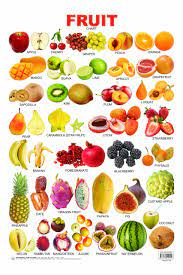
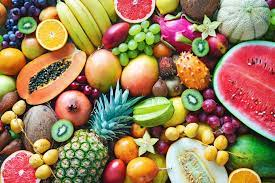
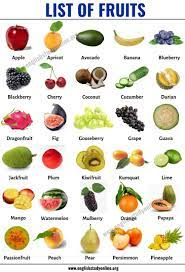
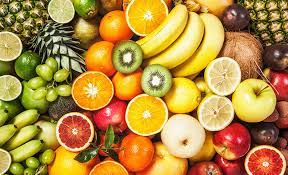
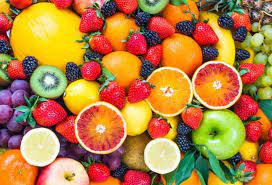
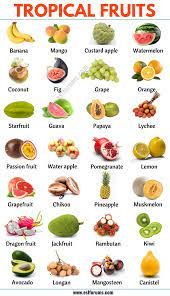
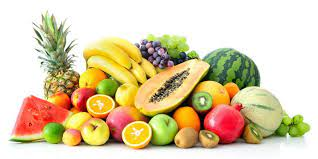
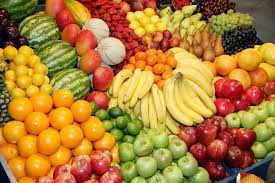
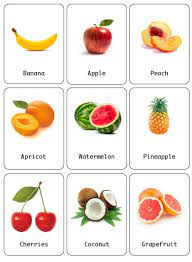
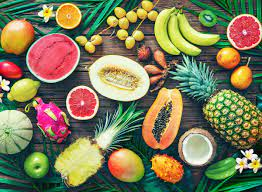
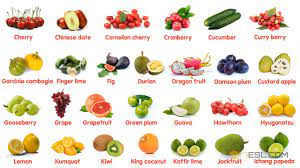
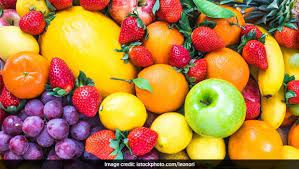
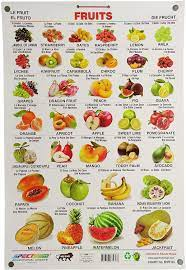
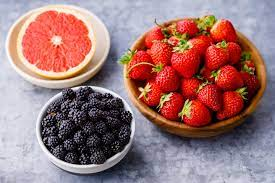
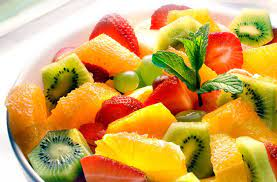
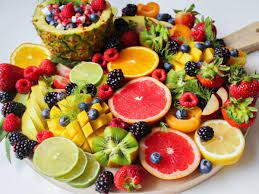
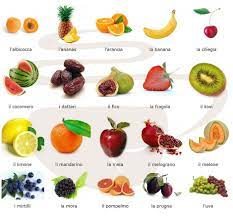
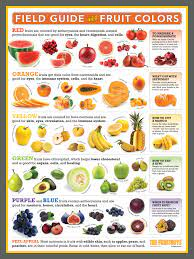
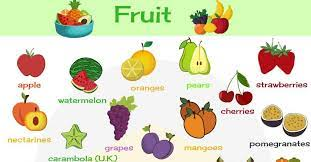
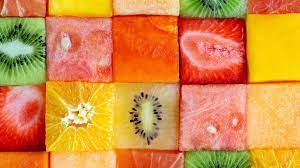

In [145]:
image_URL

In [146]:
len(image_URL)

100

In [147]:
#find the element for search bar
search=driver.find_element_by_xpath("//input[@class='og3lId']")
#write on the search bar
search.send_keys("cars")

In [148]:
#click on the search button
button=driver.find_element_by_id("BIqFsb")
button.click()

In [152]:
#click on show more
driver.find_element_by_xpath("//div[@class='YstHxe']//input").click()

In [153]:
image_cars=[]
for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")[:100]:
    image_cars.append(i.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVkCO4ivr8ekmy7mwlk0HdBVPZJMhfnclepA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyMurcEluQ5blOUZgaUN_RAAsFJYgp37mLXQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPw0j0LeyCNn_OoYy9hqMuFrVKToA9pS62aw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPTXYOJCG-NmDxyu_Rzo6oO5OMgCdRWgTkkA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3HcVG27eK--uy6usCydFQ3udgQUt8firi2A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTL8es92nEfJZrPYTja1BR9UumhnPnF3ObsWQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFQD8FHJ2cf_3_trxiRLElMRBl6yHz--OmJA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-3MwDlCOEG1GrAbFYmre27Ch1kvR5nBt1Qw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhNdQW_RyoJB
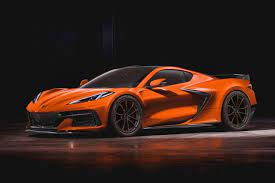
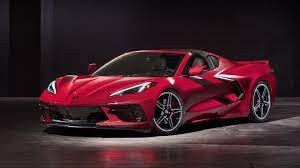
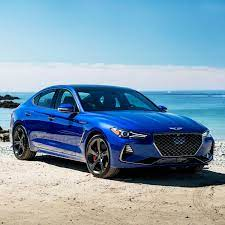
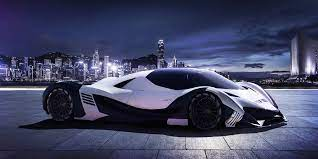
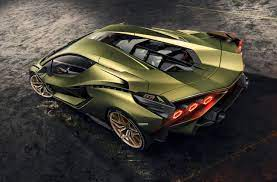
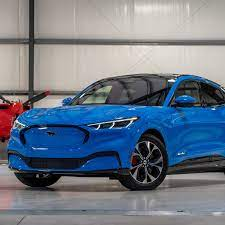
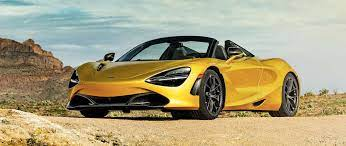
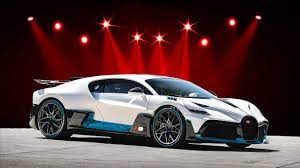
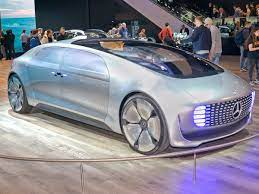
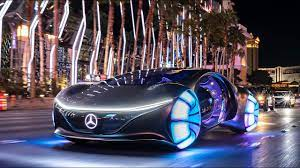
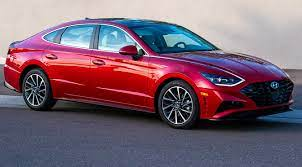
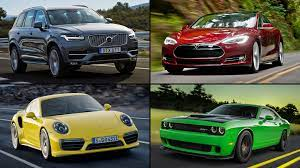
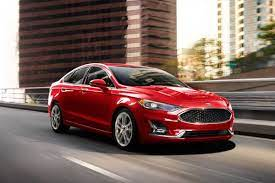
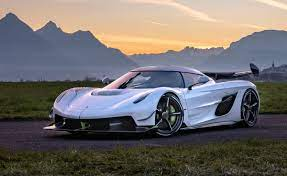
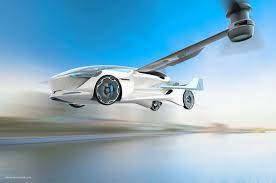
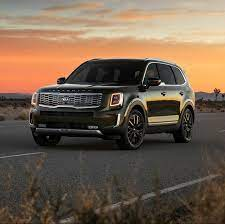
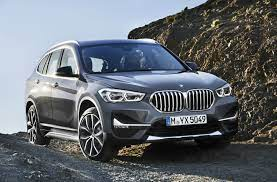
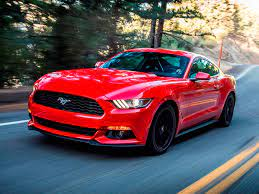
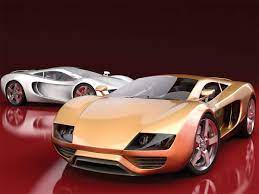
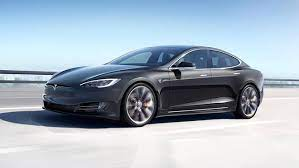

In [154]:
image_cars

In [155]:
len(image_cars)

100

In [156]:
#write on the search bar
driver.find_element_by_xpath("//input[@class='og3lId']").send_keys("Machine Learning")

In [157]:
#click on the search button
driver.find_element_by_xpath("//button[@class='rCGXm']").click()

In [159]:
#click on show more
driver.find_element_by_xpath("//div[@class='YstHxe']//input").click()

In [160]:
image_ML=[]
for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")[:100]:
    image_ML.append(i.get_attribute('src'))                                  

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSStzA7U2Svu6OSEzfKGBPxzCbfMS0sjtrPvA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8abGOPPGSsXlL1LCDbx86fl36YVe5JaEHaw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8AK6b890PmWHvzwokzR7CYdRfr82f0wZmfw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfN12oiCbkM3yQNEyPU1BU2oWCHh3gEGKNcA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZc_PTpvBRL66czmsoFIqQhIpsE7sI71vIGA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6pXKheWis4s1mdsreCU9vaAnwf-v70L8-lg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7j4ASNxTH7SfD3heeO9eFXPxDPhF2_no5eA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThKWzCEIz4Qlh_hyRMcifUF8AUU-dK_N7iRg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToqqMfOrfY6G
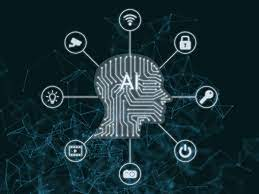
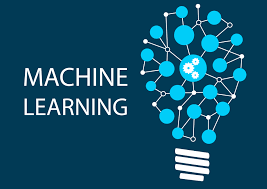
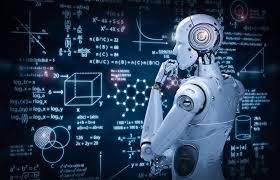
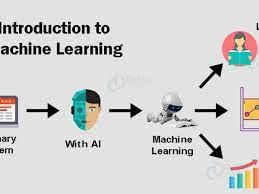
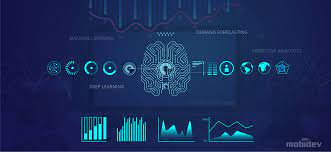
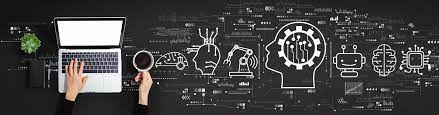
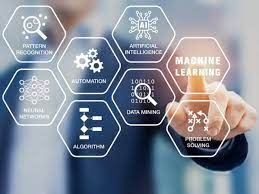
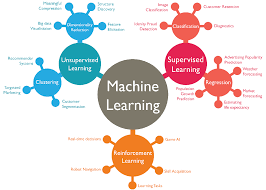
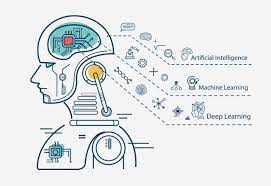
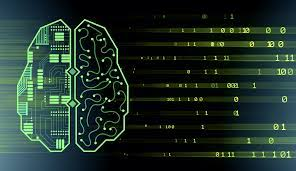
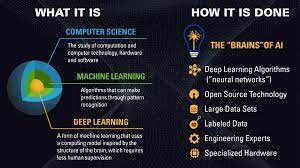
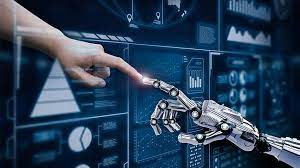
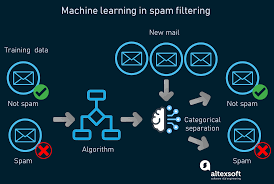
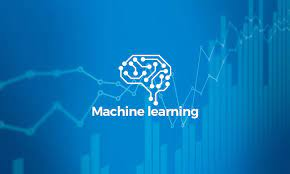
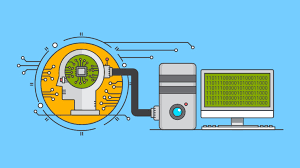
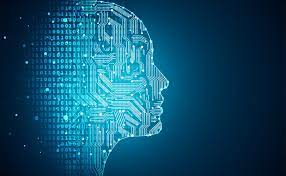
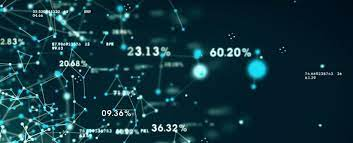
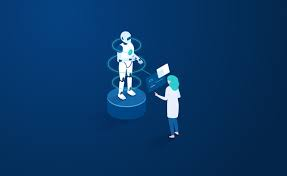
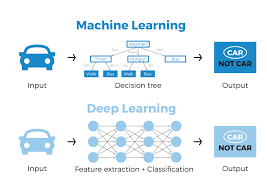
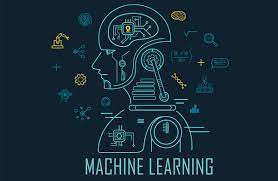

In [161]:
image_ML

In [162]:
len(image_ML)

100

# Q4

Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on 
www.flipkart.com and scrape following details for all the search results displayed on 1st page. 
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, 
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display 
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. 
Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe 
and CSV.

In [163]:
#importing required libraries
import pandas as pd
import selenium
from selenium import webdriver
import time

In [164]:
#connecting to the web driver
driver=webdriver.Chrome("chromedriver.exe")

In [165]:
url='http://www.flipkart.com/'
driver.get(url)

In [167]:
#find the element for searchbar
search_bar=driver.find_element_by_xpath("//div[@class='_3OO5Xc']//input")
#write on the search bar
search_bar.send_keys('samsung galaxy 8gb ram 128 gb')

In [168]:
#Click on the search button
driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()

In [169]:
urls=[]
#scrapping urls of the products
for i in driver.find_elements_by_xpath("//a[@class='_1fQZEK']"):
    urls.append(i.get_attribute("href"))    

In [170]:
urls

['https://www.flipkart.com/samsung-galaxy-f62-laser-grey-128-gb/p/itm97ec206bb0bde?pid=MOBFZWSUMTPWSGQH&lid=LSTMOBFZWSUMTPWSGQHBJDWJX&marketplace=FLIPKART&q=samsung+galaxy+8gb+ram+128+gbsamsung+galaxy+8gb+ram+128+gb&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=25af3e5a-2833-4b71-b5c5-a1b0ee99742b.MOBFZWSUMTPWSGQH.SEARCH&ppt=hp&ppn=homepage&ssid=in96a4ifq80000001622767407624&qH=64d306a54acfc075',
 'https://www.flipkart.com/samsung-galaxy-f62-laser-blue-128-gb/p/itmba1329c393a14?pid=MOBFZWSTSZGFGGTR&lid=LSTMOBFZWSTSZGFGGTREMWENA&marketplace=FLIPKART&q=samsung+galaxy+8gb+ram+128+gbsamsung+galaxy+8gb+ram+128+gb&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=25af3e5a-2833-4b71-b5c5-a1b0ee99742b.MOBFZWSTSZGFGGTR.SEARCH&ppt=hp&ppn=homepage&ssid=in96a4ifq80000001622767407624&qH=64d306a54acfc075',
 'https://www.flipkart.com/samsung-galaxy-m31-ocean-blue-128-gb/p/itm1e7ce328b07b6?pid=MOBFUYQTFBAYCFKG&lid=LSTMOBFUYQTFBAYCFKGG98HR9&marketplac

In [171]:
#creating empty lists
brand_name=[]
phone_name=[]
colour=[]
RAM=[]
ROM=[]
primary_camera=[]
secondary_camera=[]
Display_size=[]
Display_res=[]
processor_type=[]
processor_core=[]
battery_capacity=[]
price=[]
product_url=[]

In [172]:
from selenium.common.exceptions import NoSuchElementException
for i in urls:
    driver.get(i)
    time.sleep(4)
    
   #fetching the brand of the product
    try:
        brand=driver.find_element_by_xpath("//div[@class='aMaAEs']//span")
        brand_name.append(brand.text)
    except NoSuchElementException:
        brand_name.append('-')
    #fetching the name of the product
    try:
        phone=driver.find_element_by_xpath("//div[@class='_3k-BhJ'][1]//table//tbody//tr[3]//td[2]//ul//li")
        phone_name.append(phone.text)
    except NoSuchElementException:
        phone_name.append('-')
    #fetching the colour of phone
    try:
        colour_tag=driver.find_element_by_xpath("//div[@class='_3k-BhJ'][1]//table//tr[4]//td[2]//ul//li")
        colour.append(colour_tag.text)
    except NoSuchElementException:
        colour.append('-')
    # click on the button READ MORE
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']").click()   
    #feiching the details of product display
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/div').text != "Display Features" :
            
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/div').text == "Display Features" :
                ds= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table/tbody/tr[1]/td[1]')
                if ds.text != "Display Size" : raise NoSuchElementException
                display= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table/tbody/tr[1]/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/div').text == "Display Features" :     
                ds= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[1]/td[1]')
                if ds.text != "Display Size" : raise NoSuchElementException
                display= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[1]/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            ds= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table/tbody/tr[1]/td[1]')
            if ds.text != "Display Size" : raise NoSuchElementException
            display = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table/tbody/tr[1]/td[2]/ul/li')
        Display_size.append(display.text)
    except NoSuchElementException:
        Display_size.append('-')
     #fetching the details of display resolution   
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/div').text != "Display Features" :   
           
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/div').text == "Display Features" :
                ds= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table/tbody/tr[2]/td[1]')
                if ds.text != "Resolution" : raise NoSuchElementException
                display_res= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table/tbody/tr[2]/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/div').text == "Display Features" :     
                ds= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[2]/td[1]')
                if ds.text != "Resolution" : raise NoSuchElementException
                display_res= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[2]/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            ds= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table/tbody/tr[2]/td[1]')
            if ds.text != "Resolution" : raise NoSuchElementException
            display_res = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table/tbody/tr[2]/td[2]/ul/li')         
        Display_res.append(display_res.text)
    except NoSuchElementException:
        Display_res.append('-')
    #fetching the details of PROCESSOR
    try:
        pro_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[1]')
        if pro_chk.text != "Processor Type" :
            pro_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[1]/td[1]')
            if pro_chk.text != "Processor Type" : 
                raise NoSuchElementException
            else :
                processor= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[1]/td[2]/ul/li')
        else :
            processor= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[2]/ul/li')
        processor_type.append(processor.text)
    except NoSuchElementException:
        
        processor_type.append('-')
        
    #fetching the processor core
    try:
        core_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[3]/td[1]')
        if core_chk.text != "Processor Core" :
            core_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[1]')
            if core_chk.text != "Processor Core" : 
                raise NoSuchElementException
            else :
                cores= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[2]/ul/li')
        else :
            cores= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[3]/td[2]/ul/li')
        processor_core.append(cores.text)
    except NoSuchElementException:
        
        processor_core.append('-')
    
        
    #fetching ROM
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/div').text != "Memory & Storage Features" :
          
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/div').text == "Memory & Storage Features" :
                IS= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table/tbody/tr/td[1]')
                if IS.text != "Internal Storage" : raise NoSuchElementException
                rom = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table/tbody/tr/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/div').text == "Memory & Storage Features" :     
                IS= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table/tbody/tr/td[1]')
                if IS.text != "Internal Storage" : raise NoSuchElementException
                rom = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table/tbody/tr/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            IS= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table/tbody/tr/td[1]')
            if IS.text != "Internal Storage" : raise NoSuchElementException
            rom = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table/tbody/tr/td[2]/ul/li')                
        ROM.append(rom.text)
    except NoSuchElementException:
        ROM.append('-')
         
    #fetching RAM
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/div').text != "Memory & Storage Features" :   
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/div').text == "Memory & Storage Features" :
                ram1= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table/tbody/tr[2]/td[1]')
                if ram1.text != "RAM" : raise NoSuchElementException
                ram = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table/tbody/tr[2]/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/div').text == "Memory & Storage Features" :     
                ram1= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table/tbody/tr[2]/td[1]')
                if ram1.text != "RAM" : raise NoSuchElementException
                ram = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table/tbody/tr[2]/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            ram1= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table/tbody/t[2]r/td[1]')
            if ram1.text != "RAM" : raise NoSuchElementException
            ram = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table/tbody/tr[2]/td[2]/ul/li')                
        RAM.append(ram.text)
    except NoSuchElementException:
        RAM.append('-') 
    #fetching primary camera
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][6]/div').text != "Camera Features" :   
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/div').text == "Camera Features" :
                pc= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table/tbody/tr[2]/td[1]')
                if pc.text != "Primary Camera" : raise NoSuchElementException
                prim= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table/tbody/tr[2]/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/div').text == "Camera Features" :     
                pc= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table/tbody/tr[2]/td[1]')
                if pc.text != "Primary Camera" : raise NoSuchElementException
                prim= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table/tbody/tr[2]/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            pc= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][6]/table/tbody/tr[2]/td[1]')
            if pc.text != "Primary Camera" : raise NoSuchElementException
            prim = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][6]/table/tbody/tr[2]/td[2]/ul/li')                
        primary_camera.append(prim.text)
        
    except NoSuchElementException:
        primary_camera.append('-') 
    #fetching secondary camera
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][6]/div').text != "Camera Features" :   
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/div').text == "Camera Features" :
                sc= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table/tbody/tr[5]/td[1]')
                if sc.text != "Secondary Camera" : raise NoSuchElementException
                sec= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table/tbody/tr[5]/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/div').text == "Camera Features" :     
                sc= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table/tbody/tr[5]/td[1]')
                if sc.text != "Secondary Camera" : raise NoSuchElementException
                sec= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table/tbody/tr[5]/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            sc= driver.find_element_by_xpath('//div[@class="_3k-BhJ"][6]/table/tbody/tr[5]/td[1]')
            if sc.text != "Secondary Camera" : raise NoSuchElementException
            sec = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][6]/table/tbody/tr[5]/td[2]/ul/li') 
        secondary_camera.append(sec.text)
        
    except NoSuchElementException:
        secondary_camera.append('-') 
    #fetching battery capacity
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][11]/div').text != "Battery & Power Features" :  
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/div').text == "Battery & Power Features" :
                bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr/td[1]')
                if bat_chk.text != "Battery Capacity" : raise NoSuchElementException
                bat_cap = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/div').text == "Battery & Power Features" :     
                bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/table/tbody/tr/td[1]')
                if bat_chk.text != "Battery Capacity" : raise NoSuchElementException
                bat_cap = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/table/tbody/tr/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            bat_chk = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][11]/table/tbody/tr/td[1]')
            if bat_chk.text != "Battery Capacity" : raise NoSuchElementException
            bat_cap = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][11]/table/tbody/tr/td[2]/ul/li')                
        battery_capacity.append(bat_cap.text)
    except NoSuchElementException:
        battery_capacity.append('-')
          
    #fetching price
    try:
        price_tag=driver.find_element_by_xpath("//div[@class='_25b18c']//div[1]")
        price.append(price_tag.text)
    except NoSuchElementException:
        price.append('-')  
        
    product_url.append(urls)   

In [173]:
brand_name

['SAMSUNG Galaxy F62 (Laser Grey, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy F62 (Laser Blue, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy M31 (Ocean Blue, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy F62 (Laser Green, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy A51 (Prism Crush Blue, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy A71 (Haze Crush Silver, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy A51 (Prism Crush Black, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy M31 (Space Black, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy M51 (Electric Blue, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy A51 (Haze Crush Silver, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy A70s (Prism Crush Red, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy A72 (Awesome Black, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy M51 (Celestial Black, 128 GB)  (8 GB RAM)',
 'SAMSUNG GALAXY M31S (Mirage Black, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy S20 FE (Cloud Navy, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy S21 Plus (Phantom Black, 128 GB)  (8 GB RAM)',
 'SAMSUNG Galaxy S20+ (Cosmic Gray, 128 GB) 

In [174]:
phone_name

['Galaxy F62',
 'Galaxy F62',
 'Galaxy M31',
 'Galaxy F62',
 '-',
 '-',
 '-',
 'Galaxy M31',
 'Galaxy M51',
 '-',
 'Galaxy A70s',
 'Galaxy A72',
 'Galaxy M51',
 'GALAXY M31S',
 'Galaxy S20 FE',
 'Galaxy S21 Plus',
 'Galaxy S20+',
 'Galaxy S20 FE',
 'Galaxy S20 FE',
 'Galaxy A70s',
 'Galaxy A9',
 'Galaxy S21 Plus',
 'Galaxy S10',
 'Galaxy A80']

In [175]:
colour

['Laser Grey',
 'Laser Blue',
 'Ocean Blue',
 'Laser Green',
 '-',
 '-',
 '-',
 'Space Black',
 'Electric Blue',
 '-',
 'Prism Crush Red',
 'Awesome Black',
 'Celestial Black',
 'Mirage Black',
 'Cloud Navy',
 'Phantom Black',
 'Cosmic Gray',
 'Cloud White',
 'Cloud Lavender',
 'Prism Crush White',
 'Caviar Black',
 'Phantom Violet',
 'Prism Blue',
 'Phantom Black']

In [176]:
RAM

['8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '-',
 '-',
 '-',
 '8 GB',
 '8 GB',
 '-',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB',
 '8 GB']

In [177]:
ROM

['128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB']

In [178]:
primary_camera

['64MP + 12MP + 5MP + 5MP',
 '64MP + 12MP + 5MP + 5MP',
 '64MP + 8MP + 5MP + 5MP',
 '64MP + 12MP + 5MP + 5MP',
 '48MP + 12MP + 5MP + 5MP',
 '64MP + 12MP + 5MP + 5MP',
 '48MP + 12MP + 5MP + 5MP',
 '64MP + 8MP + 5MP + 5MP',
 '64MP Rear Camera',
 '48MP + 12MP + 5MP + 5MP',
 '64MP + 5MP + 8MP',
 '64MP + 12MP + 8MP + 5MP',
 '64MP Rear Camera',
 '-',
 '12MP + 12MP + 8MP Rear Camera',
 '64MP + 12MP + 12MP',
 '64 MP + 12 MP +12 MP + VGA Depth Camera',
 '12MP + 12MP + 8MP Rear Camera',
 '12MP + 12MP + 8MP Rear Camera',
 '64MP + 5MP + 8MP',
 '24MP + 5MP + 10MP + 8MP',
 '64MP + 12MP + 12MP',
 '16MP + 12MP',
 '48MP + 8MP']

In [179]:
secondary_camera

['-',
 '-',
 '32MP Front Camera',
 '-',
 '32MP Front Camera',
 '32MP Front Camera',
 '32MP Front Camera',
 '32MP Front Camera',
 '-',
 '32MP Front Camera',
 '32MP Front Camera',
 '-',
 '-',
 '-',
 '32MP Front Camera',
 '-',
 '10MP Front Camera',
 '32MP Front Camera',
 '32MP Front Camera',
 '32MP Front Camera',
 '-',
 '-',
 '-',
 '48MP(F2.0) + 8MP(Ultra Wide/F2.2) + TOF (Time-of-Flight) 3D-Depth Rotating Camera']

In [180]:
Display_size

['17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '16.26 cm (6.4 inch)',
 '17.02 cm (6.7 inch)',
 '16.51 cm (6.5 inch)',
 '17.02 cm (6.7 inch)',
 '16.51 cm (6.5 inch)',
 '16.26 cm (6.4 inch)',
 '17.02 cm (6.7 inch)',
 '16.51 cm (6.5 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '16.51 cm (6.5 inch)',
 '16.51 cm (6.5 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '16.51 cm (6.5 inch)',
 '16.51 cm (6.5 inch)',
 '17.02 cm (6.7 inch)',
 '16.0 cm (6.3 inch)',
 '17.02 cm (6.7 inch)',
 '15.49 cm (6.1 inch)',
 '17.02 cm (6.7 inch)']

In [181]:
Display_res

['2400 x 1080 Pixels',
 '2400 x 1080 Pixels',
 '2340 x 1080$$pixel',
 '2400 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080$$pixel',
 '1080 x 2400$$Pixels',
 '2340 x 1080 Pixels',
 '1080 x 2400 Pixels',
 '2400 x 1080 Pixels',
 '1080 x 2400$$pixels',
 '1080 x 2400$$pixel',
 '2400 x 1080 Pixels',
 '2400 x 1080 Pixels',
 '3200 x 1440 Pixels',
 '2400 x 1080 Pixels',
 '2400 x 1080 Pixels',
 '1080 x 2400 Pixels',
 '2220 x 1080 pixels',
 '2400 x 1080 Pixels',
 '3040 x 1440 pixel',
 '1080 x 2400 pixels']

In [182]:
price

['₹25,999',
 '₹25,999',
 '₹18,998',
 '₹25,999',
 '₹22,499',
 '₹27,499',
 '₹22,499',
 '₹20,199',
 '₹25,949',
 '₹22,499',
 '₹33,100',
 '₹34,999',
 '₹25,849',
 '₹21,777',
 '₹37,990',
 '₹76,999',
 '₹54,999',
 '₹37,990',
 '₹37,990',
 '₹33,100',
 '₹28,490',
 '₹76,999',
 '₹71,000',
 '₹52,000']

In [183]:
processor_type

['Exynos 9825',
 'Exynos 9825',
 'Samsung Exynos 9 Octa 9611',
 'Exynos 9825',
 '-',
 '-',
 '-',
 'Samsung Exynos 9 Octa 9611',
 '-',
 '-',
 'Qualcomm SM6150',
 'Qualcomm Snapdragon 720G',
 '-',
 '-',
 'Exynos Octa Core',
 'Exynos 2100',
 'Exynos 990',
 'Exynos Octa Core',
 'Exynos Octa Core',
 'Qualcomm SM6150',
 'Qualcomm Snapdragon 660',
 'Exynos 2100',
 'Exynos 9 9820',
 'Qualcomm Snapdragon 730G Octa-Core']

In [184]:
processor_core

['Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 '-',
 '-',
 '-',
 'Octa Core',
 'Octa Core',
 '-',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core']

In [185]:
battery_capacity

['7000 mAh',
 '7000 mAh',
 '6000 mAh',
 '7000 mAh',
 '4000 mAh',
 '4500 mAh',
 '4000 mAh',
 '6000 mAh',
 '-',
 '4000 mAh',
 '-',
 '5000 mAh',
 '-',
 '-',
 '4500 mAh',
 '4800 mAh',
 '4500 mAh',
 '4500 mAh',
 '4500 mAh',
 '-',
 '3800 mAh',
 '4800 mAh',
 '3400 mAh',
 '3700 mAh']

In [187]:
#lets check the length of the lists extracted
print(len(brand_name),len(phone_name),len(colour),len(RAM),len(ROM),
len(primary_camera),len(secondary_camera),len(Display_size),len(Display_res),len(processor_type),len(processor_core),len(battery_capacity),len(price)
,len(product_url))

24 24 24 24 24 24 24 24 24 24 24 24 24 24


In [188]:
#Lets create a dataframe
SAMSUNG_flipkart=pd.DataFrame(({}))
SAMSUNG_flipkart['Brand Name']=brand_name
SAMSUNG_flipkart['Smartphone Name']=phone_name
SAMSUNG_flipkart['Colour']=colour
SAMSUNG_flipkart['RAM']=RAM
SAMSUNG_flipkart['Storage(ROM)']=ROM
SAMSUNG_flipkart['Primary Camera']=primary_camera
SAMSUNG_flipkart['Secondary Camera']=secondary_camera
SAMSUNG_flipkart['Display Size']=Display_size
SAMSUNG_flipkart['Display Resolution']=Display_res
SAMSUNG_flipkart['Processor']=processor_type
SAMSUNG_flipkart['Processor Core']=processor_core
SAMSUNG_flipkart['Battery Capacity']=battery_capacity
SAMSUNG_flipkart['Price']=price
SAMSUNG_flipkart['Product URL']=product_url

In [189]:
SAMSUNG_flipkart

Brand Name  Smartphone Name  \
0   SAMSUNG Galaxy F62 (Laser Grey, 128 GB)  (8 GB...       Galaxy F62   
1   SAMSUNG Galaxy F62 (Laser Blue, 128 GB)  (8 GB...       Galaxy F62   
2   SAMSUNG Galaxy M31 (Ocean Blue, 128 GB)  (8 GB...       Galaxy M31   
3   SAMSUNG Galaxy F62 (Laser Green, 128 GB)  (8 G...       Galaxy F62   
4   SAMSUNG Galaxy A51 (Prism Crush Blue, 128 GB) ...                -   
5   SAMSUNG Galaxy A71 (Haze Crush Silver, 128 GB)...                -   
6   SAMSUNG Galaxy A51 (Prism Crush Black, 128 GB)...                -   
7   SAMSUNG Galaxy M31 (Space Black, 128 GB)  (8 G...       Galaxy M31   
8   SAMSUNG Galaxy M51 (Electric Blue, 128 GB)  (8...       Galaxy M51   
9   SAMSUNG Galaxy A51 (Haze Crush Silver, 128 GB)...                -   
10  SAMSUNG Galaxy A70s (Prism Crush Red, 128 GB) ...      Galaxy A70s   
11  SAMSUNG Galaxy A72 (Awesome Black, 128 GB)  (8...       Galaxy A72   
12  SAMSUNG Galaxy M51 (Celestial Black, 128 GB)  ...       Galaxy M51   
13  SAMSUNG GALAXY M31S (Mirage Black, 128 GB)  (8...      GALAXY M31S   
14  SAMSUNG Galaxy S20 FE (Cloud Navy, 128 GB)  (8...    Galaxy S20 FE   
15  SAMSUNG Galaxy S21 Plus (Phantom Black, 128 GB...  Galaxy S21 Plus   
16  SAMSUNG Galaxy S20+ (Cosmic Gray, 128 GB)  (8 ...      Galaxy S20+   
17  SAMSUNG Galaxy S20 FE (Cloud White, 128 GB)  (...    Galaxy S20 FE   
18  SAMSUNG Galaxy S20 FE (Cloud Lavender, 128 GB)...    Galaxy S20 FE   
19  SAMSUNG Galaxy A70s (Prism Crush White, 128 GB...      Galaxy A70s   
20  SAMSUNG Galaxy A9 (Caviar Black, 128 GB)  (8 G...        Galaxy A9   
21  SAMSUNG Galaxy S21 Plus (Phantom Violet, 128 G...  Galaxy S21 Plus   
22  SAMSUNG Galaxy S10 (Prism Blue, 128 GB)  (8 GB...       Galaxy S10   
23  SAMSUNG Galaxy A80 (Phantom Black, 128 GB)  (8...       Galaxy A80   

               Colour   RAM Storage(ROM)  \
0          Laser Grey  8 GB       128 GB   
1          Laser Blue  8 GB       128 GB   
2          Ocean Blue  8 GB       128 GB   
3         Laser Green  8 GB       128 GB   
4                   -     -       128 GB   
5                   -     -       128 GB   
6                   -     -       128 GB   
7         Space Black  8 GB       128 GB   
8       Electric Blue  8 GB       128 GB   
9                   -     -       128 GB   
10    Prism Crush Red  8 GB       128 GB   
11      Awesome Black  8 GB       128 GB   
12    Celestial Black  8 GB       128 GB   
13       Mirage Black  8 GB       128 GB   
14         Cloud Navy  8 GB       128 GB   
15      Phantom Black  8 GB       128 GB   
16        Cosmic Gray  8 GB       128 GB   
17        Cloud White  8 GB       128 GB   
18     Cloud Lavender  8 GB       128 GB   
19  Prism Crush White  8 GB       128 GB   
20       Caviar Black  8 GB       128 GB   
21     Phantom Violet  8 GB       128 GB   
22         Prism Blue  8 GB       128 GB   
23      Phantom Black  8 GB       128 GB   

                             Primary Camera  \
0                   64MP + 12MP + 5MP + 5MP   
1                   64MP + 12MP + 5MP + 5MP   
2                    64MP + 8MP + 5MP + 5MP   
3                   64MP + 12MP + 5MP + 5MP   
4                   48MP + 12MP + 5MP + 5MP   
5                   64MP + 12MP + 5MP + 5MP   
6                   48MP + 12MP + 5MP + 5MP   
7                    64MP + 8MP + 5MP + 5MP   
8                          64MP Rear Camera   
9                   48MP + 12MP + 5MP + 5MP   
10                         64MP + 5MP + 8MP   
11                  64MP + 12MP + 8MP + 5MP   
12                         64MP Rear Camera   
13                                        -   
14            12MP + 12MP + 8MP Rear Camera   
15                       64MP + 12MP + 12MP   
16  64 MP + 12 MP +12 MP + VGA Depth Camera   
17            12MP + 12MP + 8MP Rear Camera   
18            12MP + 12MP + 8MP Rear Camera   
19                         64MP + 5MP + 8MP   
20                  24MP + 5MP + 10MP + 8MP   
21                       64MP + 12MP + 12MP   
22        

In [190]:
#save as csv file
SAMSUNG_flipkart.to_csv("SMART_phones-FLIPKART.csv")

# Q5

Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on 
google maps.

In [161]:
import pandas as pd
import selenium
from selenium import webdriver
import time

In [162]:
driver=webdriver.Chrome('chromedriver.exe')

In [163]:
url='https://maps.google.co.in'
driver.get(url)

In [164]:
#find the element for search bar
search_bar=driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']")
#write on the search bar
search_bar.send_keys('Kochi,Kerala')

In [165]:
#click on the search button
driver.find_element_by_id("searchbox-searchbutton").click()

In [166]:
lat_long=driver.find_element_by_xpath("//h1[@class='x3AX1-LfntMc-header-title-title gm2-headline-5']")
lat_long

<selenium.webdriver.remote.webelement.WebElement (session="516b9ae234cb09781e3056633017066e", element="59d69f25-40fd-471f-8ea3-b3168a5ed2ed")>

In [167]:
Geospatial_coordinates=lat_long.text
Geospatial_coordinates

'9°56\'32.8"N 76°16\'04.7"E'

# Q6

In [177]:
import pandas as pd
import selenium
from selenium import webdriver
import time

In [178]:
driver=webdriver.Chrome('chromedriver.exe')

In [179]:
url='https://trak.in/india-startup-funding-investment-2015/'
driver.get(url)

In [180]:
number_tag=driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[1]")
number_tag

[<selenium.webdriver.remote.webelement.WebElement (session="34b258fb54c2ef5f93660cfd0271a2f8", element="6cf487a6-e23a-482d-b7e2-a33a093f75ad")>,
 <selenium.webdriver.remote.webelement.WebElement (session="34b258fb54c2ef5f93660cfd0271a2f8", element="8b5580fd-05d7-46f3-bbbf-e3c23a32af61")>,
 <selenium.webdriver.remote.webelement.WebElement (session="34b258fb54c2ef5f93660cfd0271a2f8", element="59b1f609-48bd-4fa3-abd3-e10297c45309")>,
 <selenium.webdriver.remote.webelement.WebElement (session="34b258fb54c2ef5f93660cfd0271a2f8", element="5b156599-817d-45ba-add0-83c4f025acc1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="34b258fb54c2ef5f93660cfd0271a2f8", element="45240e4d-3d5d-46b7-9f29-2678bd7648a2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="34b258fb54c2ef5f93660cfd0271a2f8", element="92c112d8-c176-4ec3-9bdf-1cc557595df4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="34b258fb54c2ef5f93660cfd0271a2f8", element="823a33bc-1500-4af5-bb34-6d

In [181]:
sl_no=[]
for i in number_tag:
    sl_no.append(i.text)
sl_no    

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [182]:
date=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[2]"):
    date.append(i.text)
date    

['15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020']

In [184]:
startup_name=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[3]"):
    startup_name.append(i.text)
startup_name    

['Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.']

In [186]:
industry_vertical=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[4]"):
    industry_vertical.append(i.text)
industry_vertical    

['E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology']

In [188]:
sub_vertical=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[5]"):
    sub_vertical.append(i.text)
sub_vertical    

['E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions']

In [190]:
city=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[6]"):
    city.append(i.text)
city    

['Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore']

In [192]:
investor_name=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[7]"):
    investor_name.append(i.text)
investor_name    

['Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.',
 'Recruit Co. Ltd.',
 'Adar Poonawalla and Kris Gopalakrishnan.',
 'Incubate Fund India and Beyond Next Ventures',
 'Early Adapters Syndicate',
 'Raj Mishra, founder of AIT Global Inc',
 'Unicorn India Ventures']

In [197]:
investment_type=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[8]"):
    investment_type.append(i.text)
investment_type    

['M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown']

In [196]:
amount=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-48 dataTable no-footer']//td[9]"):
    amount.append(i.text)
amount    

['1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000']

Lets check the length of the lists extracted.if the lengths are not same,then we can't form a dataframe.

In [198]:
len(sl_no),len(date),len(startup_name),len(industry_vertical),len(sub_vertical),len(city),len(investor_name),len(investment_type),len(amount)

(10, 10, 10, 10, 10, 10, 10, 10, 10)

In [199]:
funding_july2020=pd.DataFrame(({}))
funding_july2020['Sr.No.']=sl_no
funding_july2020['Date']=date
funding_july2020['Startup Name']=startup_name
funding_july2020['Industry/Vertical']=industry_vertical
funding_july2020['Sub-Vertical']=sub_vertical
funding_july2020['City']=city
funding_july2020['Investors Name']=investor_name
funding_july2020['Investment Type']=investment_type
funding_july2020['Amount(In USD)']=amount


lets extract the funding deals of the month august 2020

In [202]:
#lets extract the sr.no
sr_no=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[1]"):
    sr_no.append(i.text)
sr_no    

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [203]:
#lets extract date
date=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[2]"):
    date.append(i.text)
date    

['15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '03/08/2020',
 '04/08/2020']

In [205]:
startup_name=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[3]"):
    startup_name.append(i.text)
startup_name    

['Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz',
 'CrowdPouch',
 'DrinkPrime']

In [206]:
industry_vertical=[]


for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[4]"):
    industry_vertical.append(i.text)
industry_vertical

['HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech',
 'FinTech',
 'Water Purification']

In [207]:
sub_vertical=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[5]"):
    sub_vertical.append(i.text)
sub_vertical    

['Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services',
 'Financial Services',
 'Water Purification']

In [209]:
city_location=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[6]"):
    city_location.append(i.text)
city_location    

['Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore']

In [210]:
investors_name=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[7]"):
    investors_name.append(i.text)
investors_name 

['A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus',
 'Elina Investments Pvt. Ltd',
 'Sequoia Surge, ON Mauritius']

In [217]:
investment_type=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[8]"):
    if i.text == '' :
        investment_type.append('-')
    else:
        investment_type.append(i.text)
investment_type 

['Series F',
 '-',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '-',
 '-',
 'Venture',
 'Series A',
 'Angel',
 'Pre-Series A']

In [219]:
amount=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-49 dataTable no-footer']//td[9]"):
    if i.text is None :
        amount.append('-')
    else:
        amount.append(i.text)
amount 

['32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000',
 'NA',
 '2,880,000']

Lets check the length of the list extracted.if the lengths are not same,we can't form a dataframe.

In [220]:
len(sr_no),len(date),len(startup_name),len(industry_vertical),len(sub_vertical),len(city_location),len(investors_name),len(investment_type),len(amount)

(12, 12, 12, 12, 12, 12, 12, 12, 12)

In [221]:
#lets build a dataframe for the funding deals of august 2020
funding_August2020=pd.DataFrame(({}))
funding_August2020['Sr.No.']=sr_no
funding_August2020['Date']=date
funding_August2020['Startup Name']=startup_name
funding_August2020['Industry/Vertical']=industry_vertical
funding_August2020['Sub-Vertical']=sub_vertical
funding_August2020['City/Location']=city_location
funding_August2020['Investors Name']=investors_name
funding_August2020['Investment Type']=investment_type
funding_August2020['Amount(In USD)']=amount

Now we are going to extract the funding deals of september2020

In [224]:
#lets extract the sr.no
sr_no=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[1]"):
    sr_no.append(i.text)
sr_no    

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [225]:
#lets extract date
date=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[2]"):
    date.append(i.text)
date   

['08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '08/09/2020']

In [226]:
startup_name=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[3]"):
    startup_name.append(i.text)
startup_name 

['Byju’s',
 'mCaffeine',
 'Qshala',
 'Winzo',
 'Hippo Video',
 'Melorra',
 '1mg',
 'mfine',
 'Apna',
 'Railofy',
 'Cell Propulsion']

In [227]:
industry_vertical=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[4]"):
    industry_vertical.append(i.text)
industry_vertical

['EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerce',
 'HealthTech',
 'Human Resources',
 'Transportation',
 'Automobile']

In [228]:
sub_vertical=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[5]"):
    sub_vertical.append(i.text)
sub_vertical    

['Online Tutoring',
 'Skincare & Haircare',
 'Online Curiosity Platform for Kids',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'Online Jewelry Store',
 'Online Pharmacy',
 'On-Demand Healthcare Services',
 'Recruitment Platform',
 'WL & RAC protection platform',
 'Electric Mobility Solutions']

In [229]:
city_location=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[6]"):
    city_location.append(i.text)
city_location    

['Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore']

In [230]:
investors_name=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[7]"):
    investors_name.append(i.text)
investors_name

['Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
 'Rainmatter Capital',
 'Kalaari Capital Partners, IndigoEdge Management Consultancy',
 'Alpha Wave Incubation, Exfinity Venture Partners and existing backers.',
 'Shadow Holdings, Lightbox.',
 'Gaja Capital, Tata Capital, Partners Group',
 'Caretech Pte Inc',
 'Lightspeed India and Sequoia Capital India',
 'Chiratae Ventures',
 'growX Ventures and Micelio']

In [231]:
investment_type=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[8]"):
    investment_type.append(i.text)
investment_type

['Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed',
 'pre-Series A']

In [232]:
amount=[]
for i in driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-50 dataTable no-footer']//td[9]"):
    amount.append(i.text)
amount 

['500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000',
 'NA']

Lets check the length of the list extracted.if the lengths are not same,we can't form a dataframe

In [233]:
len(sr_no),len(date),len(startup_name),len(industry_vertical),len(sub_vertical),len(city_location),len(investors_name),len(investment_type),len(amount)

(11, 11, 11, 11, 11, 11, 11, 11, 11)

In [234]:
#lets build a dataframe for the funding deals of september 2020
funding_september2020=pd.DataFrame(({}))
funding_september2020['Sr.No.']=sr_no
funding_september2020['Date']=date
funding_september2020['Startup Name']=startup_name
funding_september2020['Industry/Vertical']=industry_vertical
funding_september2020['Sub-Vertical']=sub_vertical
funding_september2020['City/Location']=city_location
funding_september2020['Investors Name']=investors_name
funding_september2020['Investment Type']=investment_type
funding_september2020['Amount(In USD)']=amount

In [236]:
funding_july2020

Sr.No.        Date               Startup Name         Industry/Vertical  \
0      1  15/07/2020                   Flipkart                E-commerce   
1      2  16/07/2020                    Vedantu                   EduTech   
2      3  16/07/2020                       Crio                   EduTech   
3      4  14/07/2020                    goDutch                   FinTech   
4      5  13/07/2020                   Mystifly       Airfare Marketplace   
5      6  09/07/2020               JetSynthesys  Gaming and Entertainment   
6      7  10/07/2020                   gigIndia               Marketplace   
7      8  15/07/2020                  PumPumPum         Automotive Rental   
8      9  14/07/2020                       FLYX                OTT Player   
9     10  13/07/2020  Open Appliances Pvt. Ltd.    Information Technology   

                                        Sub-Vertical                     City  \
0                                         E-commerce                Bangalore   
1                                    Online Tutoring                Bangalore   
2                   Learning Platform for Developers                Bangalore   
3                                     Group Payments                   Mumbai   
4  Ticketing, Airline Retailing, and Post-Ticketi...  Singapore and Bangalore   
5                           Gaming and Entertainment                     Pune   
6                          Crowd Sourcing, Freelance                     Pune   
7                          Used Car-leasing platform                  Gurgaon   
8                           Streaming Social Network       New York and Delhi   
9              Internet-of-Things Security Solutions                Bangalore   

                                      Investors Name         Investment Type  \
0                                        Walmart Inc                     M&A   
1                                  Coatue Management                Series D   
2                                        021 Capital            pre-Series A   
3  Matrix India,Y Combinator, Global Founders Cap...                    Seed   
4                                   Recruit Co. Ltd.            pre-Series B   
5           Adar Poonawalla and Kris Gopalakrishnan.  Venture-Series Unknown   
6       Incubate Fund India and Beyond Next Ventures            pre-Series A   
7                           Early Adapters Syndicate                    Seed   
8              Raj Mishra, founder of AIT Global Inc                pre-Seed   
9                             Unicorn India Ventures  Venture-Series Unknown   

  Amount(In USD)  
0  1,200,000,000  
1    100,000,000  
2        934,160  
3      1,700,000  
4      3,300,000  
5        400,000  
6        974,200  
7        292,800  
8        200,000  
9        500,000

In [237]:
funding_August2020

Sr.No.        Date Startup Name      Industry/Vertical  \
0       1  15/08/2020       Practo             HealthTech   
1       2  13/08/2020      Medlife             E-commerce   
2       3  13/08/2020    HungerBox               FoodTech   
3       4  04/08/2020        Dunzo  Hyper-local Logistics   
4       5  11/08/2020     Terra.do                EduTech   
5       6  12/08/2020    Classplus                EduTech   
6       7  14/08/2020         Niyo                FinTech   
7       8  10/08/2020    ZestMoney                FinTech   
8       9  07/08/2020  FreshToHome             E-commerce   
9      10  13/08/2020      Eduvanz                FinTech   
10     11  03/08/2020   CrowdPouch                FinTech   
11     12  04/08/2020   DrinkPrime     Water Purification   

                         Sub-Vertical          City/Location  \
0            Health care and Wellness              Bangalore   
1                     Online Pharmacy              Bangalore   
2        Online Food Delivery Service              Bangalore   
3            Online Delivery Services              Bangalore   
4   Online Climate School, E-learning  Stanford, California,   
5         E-learning, Online Tutoring                  Noida   
6                  Financial Services              Bangalore   
7                  Financial Services              Bangalore   
8                       Food Delivery              Bangalore   
9                  Financial Services                 Mumbai   
10                 Financial Services              Bangalore   
11                 Water Purification              Bangalore   

                                       Investors Name Investment Type  \
0                                         A1A Company        Series F   
1          Prasid Uno Family Trust and SC Credit Fund               -   
2   One97, Sabre Partners Trust, Pratithi Investme...       Series D1   
3                                    Existing Backers     In Progress   
4   Stanford Angels and Entrepreneurs (India), BEE...            Seed   
5                                         Falcon Edge     In Progress   
6                                 Niyo Solutions Inc.               -   
7                             Primrose Hills Ventures               -   
8                                      Ascent Capital         Venture   
9                               Sequoia India, Unitus        Series A   
10                         Elina Investments Pvt. Ltd           Angel   
11                        Sequoia Surge, ON Mauritius    Pre-Series A   

     Amount(In USD)  
0        32,000,000  
1        23,000,000  
2         1,560,000  
3        30,000,000  
4         1,400,000  
5   upto 15,000,000  
6         6,000,000  
7        10,670,000  
8        16,200,000  
9         5,000,000  
10               NA  
11        2,880,000

In [238]:
funding_september2020

Sr.No.        Date     Startup Name  \
0       1  08/09/2020           Byju’s   
1       2  12/09/2020        mCaffeine   
2       3  09/09/2020           Qshala   
3       4  02/09/2020            Winzo   
4       5  09/09/2020      Hippo Video   
5       6  07/09/2020          Melorra   
6       7  07/09/2020              1mg   
7       8  31/08/2020            mfine   
8       9  31/08/2020             Apna   
9      10  03/09/2020          Railofy   
10     11  08/09/2020  Cell Propulsion   

                         Industry/Vertical  \
0                                  EduTech   
1                            Personal Care   
2                                  EduTech   
3                            Online Gaming   
4   Video Customer Experience(CX) Platform   
5                               E-commerce   
6                               E-commerce   
7                               HealthTech   
8                          Human Resources   
9                           Transportation   
10                              Automobile   

                              Sub-Vertical  \
0                          Online Tutoring   
1                      Skincare & Haircare   
2       Online Curiosity Platform for Kids   
3                            Online Gaming   
4   Video Customer Experience(CX) Platform   
5                     Online Jewelry Store   
6                          Online Pharmacy   
7            On-Demand Healthcare Services   
8                     Recruitment Platform   
9             WL & RAC protection platform   
10             Electric Mobility Solutions   

                                 City/Location  \
0                                    Bangalore   
1                                       Mumbai   
2                                    Bangalore   
3                                    New Delhi   
4   Newark, Delaware, United States of Amercia   
5                                    Bangalore   
6                                      Gurgaon   
7                                    Bangalore   
8                                    Bangalore   
9                                       Mumbai   
10                                   Bangalore   

                                       Investors Name Investment Type  \
0   Silver Lake, Tiger Global, General Atlantic an...  Private Equity   
1   Amicus Capital Private Equity I LLP, Amicus Ca...        Series B   
2                                  Rainmatter Capital           Angel   
3   Kalaari Capital Partners, IndigoEdge Managemen...        Series B   
4   Alpha Wave Incubation, Exfinity Venture Partne...        Series A   
5                          Shadow Holdings, Lightbox.  Debt Financing   
6          Gaja Capital, Tata Capital, Partners Group     In Progress   
7                                    Caretech Pte Inc        Series B   
8          Lightspeed India and Sequoia Capital India        Series A   
9                                   Chiratae Ventures            Seed   
10                         growX Ventures and Micelio    pre-Series A   

    Amount(In USD)  
0      500,000,000  
1        3,000,000  
2          370,000  
3       15,500,000  
4        4,500,000  
5   upto 8,900,000  
6      100,000,000  
7        5,400,000  
8        8,000,000  
9          950,000  
10              NA

# Q7
Write a program to scrap all the available details of top 10 gaming laptops from digit.in.

In [420]:
#lets first connect to the webdriver
driver=webdriver.Chrome('chromedriver.exe')

In [421]:
url='https://www.digit.in/'
driver.get(url)

In [422]:
#click on the search button
driver.find_element_by_xpath("//div[@class='search']//a").click()

In [423]:
from selenium.webdriver.common.keys import Keys

In [424]:
#Finding the element for search bar
search_bar=driver.find_element_by_xpath("//div[@class='top-serch']//input")
#write on search bar
search_bar.send_keys("Best gaming laptops")
#press enter
search_bar.send_keys(Keys.ENTER)

In [425]:
#selecting top10
driver.find_element_by_xpath("//div[@class='whatSearch']//li[5]").click()

In [426]:
#click on the Best gaming laptops in india
driver.find_element_by_xpath("//div[@class='col-sm-6']//div[4]").click()   

In [427]:
# fetching the product_name
Product_name=[]
for i in driver.find_elements_by_xpath("//div[@class='Top10-Seller']//table//tr//td[1]"):
    Product_name.append(i.text)

In [428]:
Product_name

['Alienware Area 51M R2',
 'Alienware m15 R3',
 'ASUS ROG Strix Scar 15',
 'Asus ROG Zephyrus G14',
 'Lenovo Legion 5i',
 'ASUS ROG ZEPHYRUS DUO 15',
 'Acer Aspire 7 gaming']

In [429]:
#fetching seller details
Seller=[]
for i in driver.find_elements_by_xpath("//td[@class='smmerchant']"):
    Seller.append(i.text)
Seller    

['N/A', 'N/A', 'N/A', 'amazon', 'N/A', 'amazon', 'N/A']

In [430]:
#scraping laotop price
Price=[]
for i in driver.find_elements_by_xpath("//td[@class='smprice']"):
    Price.append(i.text)
Price    

['N/A', '₹341990', 'N/A', '₹164990', '₹71990', '₹199990', '₹56990']

In [431]:
Description=[]
for i in driver.find_elements_by_xpath("//div[@class='Section-center']//p"):
    Description.append(i.text)
Description    

["If you want the absolute best when it comes to performance, then the Alienware Area 51M should be on top of your list. It is essentially a desktop replacement that leaves no stones unturned when it comes to delivering pure performance for gaming. It's basically a desktop in disguise, featuring up to 10th gen Intel Core i9K processors and Nvidia RTX 20-series GPU. It's worth pointing out that Area 51M is not exactly suitable for carrying around often. It's a desktop replacement that can be moved around but it's best to set it on a desk. All the variants feature a 71.1-inch display and you can configure it with panels that offer up to 4K resolution.",
 "If the Area 51M is a bit too much for you then you might want to check out the Alienware m15 R3. It's a more portable offering from the folks over at Alienware but it still packs the punch to deliver solid performance. The company hasn't updated these laptops in India with the latest 11th gen Intel Core processors, but a refresh is due 

In [432]:
Description.remove('AVAILABLE')
Description

["If you want the absolute best when it comes to performance, then the Alienware Area 51M should be on top of your list. It is essentially a desktop replacement that leaves no stones unturned when it comes to delivering pure performance for gaming. It's basically a desktop in disguise, featuring up to 10th gen Intel Core i9K processors and Nvidia RTX 20-series GPU. It's worth pointing out that Area 51M is not exactly suitable for carrying around often. It's a desktop replacement that can be moved around but it's best to set it on a desk. All the variants feature a 71.1-inch display and you can configure it with panels that offer up to 4K resolution.",
 "If the Area 51M is a bit too much for you then you might want to check out the Alienware m15 R3. It's a more portable offering from the folks over at Alienware but it still packs the punch to deliver solid performance. The company hasn't updated these laptops in India with the latest 11th gen Intel Core processors, but a refresh is due 

In [433]:
Description.remove('AVAILABLE')

In [434]:
OS=[]
for i in driver.find_elements_by_xpath("//div[@class='Spcs-details']//table//tr[3]//td[3]"):
    OS.append(i.text)
OS    

['Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Pro',
 'Windows 10',
 'Windows 10 Home']

In [435]:
Display=[]
for i in driver.find_elements_by_xpath("//div[@class='Spcs-details']//table//tr[4]//td[3]"):
    Display.append(i.text)
Display  

['17.3" (1920 x 1080)',
 '15.6" (3840 x 2160)',
 '15.6" (1920 x 1080)',
 '14" (1920 x 1080)',
 '15.6" (1920 x 1080)',
 '15.6" (3840 x 1100)',
 '15.6" (1920 x 1080)']

In [436]:
Processor=[]
for i in driver.find_elements_by_xpath("//div[@class='Spcs-details']//table//tr[5]//td[3]"):
    Processor.append(i.text)
Processor   

['10th Generation Intel® Core™ i7-10700 | 2.90 GHz',
 '10th Generation Intel® Core™ i9-10980HK | NA',
 'AMD Ryzen™ 9 5900HX | 3.3 GHz',
 'AMD 3rd Generation Ryzen 9 | 3.3 GHz',
 '10th Generation Intel® Core™ i5-10300H | 2.50 GHz',
 'Intel Core i7 10th Gen 10875H | NA',
 'AMD Ryzen™ 5-5500U hexa-core | NA']

In [437]:
Memory=[]
for i in driver.find_elements_by_xpath("//div[@class='Spcs-details']//table//tr[6]//td[3]"):
    Memory.append(i.text)
Memory   

['1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4']

In [438]:
Weight=[]
for i in driver.find_elements_by_xpath("//div[@class='Spcs-details']//table//tr[7]//td[3]"):
    Weight.append(i.text)
Weight   

['4.1', 'NA', '2.30', '1.65', '2.3', '2.4', '2.15']

In [439]:
Dimension=[]
for i in driver.find_elements_by_xpath("//div[@class='Spcs-details']//table//tr[8]//td[3]"):
    Dimension.append(i.text)
Dimension  

['27.65 x 402.6 x 319.14',
 'NA',
 '35.4 x 25.9 x 2.26',
 '32.5 x 22.1 x 1.8',
 '363.06 x 259.61 x 23.57',
 '268.30 x 360.00 x 20.90',
 '2.29 x 36.3 x 25.4']

In [440]:
Graphics_processor=[]
for i in driver.find_elements_by_xpath("//div[@class='Spcs-details']//table//tr[9]//td[3]"):
    Graphics_processor.append(i.text)
Graphics_processor   

['Intel® UHD Graphics 630',
 'NA',
 'NVIDIA® GeForce RTX™ 3070',
 'NVIDIA GeForce RTX 2060',
 'NVIDIA® GeForce® GTX 1650 4GB',
 'NVIDIA GeForce RTX 2070 Max-Q',
 'NVIDIA® GeForce® GTX 1650']

In [441]:
#extracting urls
Product_urls=[]
for i in driver.find_elements_by_xpath("//div[@class='TopNumbeHeading active sticky-footer']//a"):
    Product_urls.append(i.get_attribute('href'))    

In [442]:
Product_urls

['https://www.digit.in/laptops/alienware-area-51m-r2-price-228193.html',
 'https://www.digit.in/laptops/alienware-m15-r3-price-228207.html',
 'https://www.digit.in/laptops/asus-rog-strix-scar-15-price-228221.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-g14-price-209173.html',
 'https://www.digit.in/laptops/lenovo-legion-5i-price-228235.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-duo-15-price-215799.html',
 'https://www.digit.in/laptops/acer-aspire-7-gaming-price-223781.html']

In [443]:
#Lets check the length of the list extracted
print(len(Product_name),len(Seller),len(OS),len(Display),len(Memory),len(Weight),len(Dimension),
len(Processor),len(Graphics_processor),len(Description),len(Price),len(Product_urls))

7 7 7 7 7 7 7 7 7 7 7 7


In [446]:
#Creating a dataframe
Gaming_laptop=pd.DataFrame(({}))
Gaming_laptop['Product Name']=Product_name
Gaming_laptop['Seller']=Seller
Gaming_laptop['OS']=OS
Gaming_laptop['Display']=Display
Gaming_laptop['Memory']=Memory
Gaming_laptop['Dimension']=Dimension
Gaming_laptop['Processor']=Processor
Gaming_laptop['Weight']=Weight
Gaming_laptop['Graphics Processor']=Graphics_processor
Gaming_laptop['Description']=Description
Gaming_laptop['Price']=Price
Gaming_laptop['Product URL']=Product_urls

In [447]:
Gaming_laptop

Product Name  Seller               OS              Display  \
0     Alienware Area 51M R2     N/A  Windows 10 Home  17.3" (1920 x 1080)   
1          Alienware m15 R3     N/A  Windows 10 Home  15.6" (3840 x 2160)   
2    ASUS ROG Strix Scar 15     N/A  Windows 10 Home  15.6" (1920 x 1080)   
3     Asus ROG Zephyrus G14  amazon  Windows 10 Home    14" (1920 x 1080)   
4          Lenovo Legion 5i     N/A   Windows 10 Pro  15.6" (1920 x 1080)   
5  ASUS ROG ZEPHYRUS DUO 15  amazon       Windows 10  15.6" (3840 x 1100)   
6      Acer Aspire 7 gaming     N/A  Windows 10 Home  15.6" (1920 x 1080)   

                   Memory                Dimension  \
0   1 TB SSD/16 GBGB DDR4   27.65 x 402.6 x 319.14   
1   1 TB SSD/16 GBGB DDR4                       NA   
2   1 TB SSD/16 GBGB DDR4       35.4 x 25.9 x 2.26   
3   1 TB SSD/16 GBGB DDR4        32.5 x 22.1 x 1.8   
4   1 TB SSD/16 GBGB DDR4  363.06 x 259.61 x 23.57   
5  512 GB SSD/4 GBGB DDR4  268.30 x 360.00 x 20.90   
6  512 GB SSD/8 GBGB DDR4       2.29 x 36.3 x 25.4   

                                           Processor Weight  \
0   10th Generation Intel® Core™ i7-10700 | 2.90 GHz    4.1   
1       10th Generation Intel® Core™ i9-10980HK | NA     NA   
2                      AMD Ryzen™ 9 5900HX | 3.3 GHz   2.30   
3               AMD 3rd Generation Ryzen 9 | 3.3 GHz   1.65   
4  10th Generation Intel® Core™ i5-10300H | 2.50 GHz    2.3   
5                 Intel Core i7 10th Gen 10875H | NA    2.4   
6                  AMD Ryzen™ 5-5500U hexa-core | NA   2.15   

              Graphics Processor  \
0        Intel® UHD Graphics 630   
1                             NA   
2      NVIDIA® GeForce RTX™ 3070   
3        NVIDIA GeForce RTX 2060   
4  NVIDIA® GeForce® GTX 1650 4GB   
5  NVIDIA GeForce RTX 2070 Max-Q   
6      NVIDIA® GeForce® GTX 1650   

                                         Description    Price  \
0  If you want the absolute best when it comes to...      N/A   
1  If the Area 51M is a bit too much for you then...  ₹341990   
2  When the ASUS ROG Strix Scar 15 ended up on ou...      N/A   
3  The Asus Zephyrus G14 is a first-of-its-kind g...  ₹164990   
4  Lenovo's Legion 5i is also a suitable laptop f...   ₹71990   
5  The machine is powered by an Intel Core i7-108...  ₹199990   
6  The Acer Aspire 7 gaming laptop is a very capa...   ₹56990   

                                         Product URL  
0  https://www.digit.in/laptops/alienware-area-51...  
1  https://www.digit.in/laptops/alienware-m15-r3-...  
2  https://www.digit.in/laptops/asus-rog-strix-sc...  
3  https://www.digit.in/laptops/asus-rog-zephyrus...  
4  https://www.digit.in/laptops/lenovo-legion-5i-...  
5  https://www.digit.in/laptops/asus-rog-zephyrus...  
6  https://www.digit.in/laptops/acer-aspire-7-gam...